# 4. 多项式回归实现与应用

In [1]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

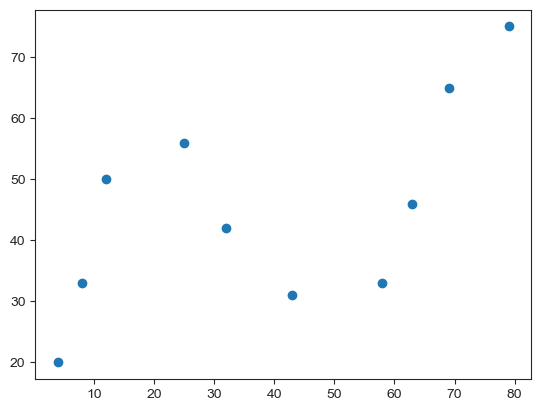

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# custom_params = {"figure.figsize": (6, 4),
#                  "font.sans-serif":"Arial Unicode MS",
#                  'axes.unicode_minus': False}
# sns.set_theme(style="ticks", font_scale=0.7, rc=custom_params)
sns.set_style("ticks")

plt.scatter(x, y)

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv' 
df = pd.read_csv(url)
df.head()

,Depth,Nporosity
0,0.25,-1.37
1,0.50,-2.08
2,0.75,-1.67
3,1.00,-1.16
4,1.25,-0.24


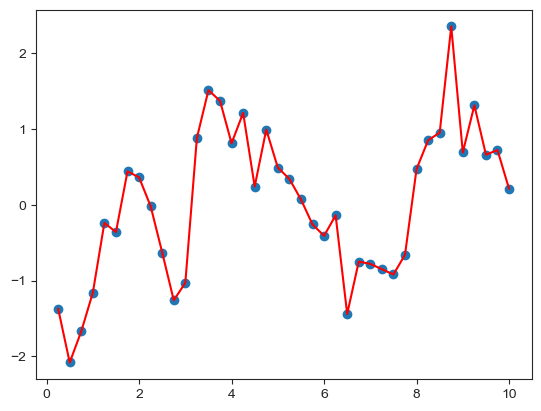

In [4]:
# 定义 x, y 的取值
x = df["Depth"]
y = df["Nporosity"]
# 绘图
plt.plot(x, y, "r")
plt.scatter(x, y)

In [5]:
# 首先划分 dateframe 为训练集和测试集
train_df = df[: int(len(df) * 0.7)]
test_df = df[int(len(df) * 0.7) :]

# 定义训练和测试使用的自变量和因变量
X_train = train_df["Depth"].values
y_train = train_df["Nporosity"].values

X_test = test_df["Depth"].values
y_test = test_df["Nporosity"].values

In [6]:
from sklearn.linear_model import LinearRegression

# 建立线性回归模型
model = LinearRegression()
model.fit(X_train.reshape(len(X_train), 1), y_train.reshape(len(y_train), 1))
results = model.predict(X_test.reshape(len(X_test), 1))
results  # 线性回归模型在测试集上的预测结果

array([[0.26222222],
       [0.29235085],
       [0.32247947],
       [0.3526081 ],
       [0.38273673],
       [0.41286535],
       [0.44299398],
       [0.47312261],
       [0.50325123],
       [0.53337986],
       [0.56350848],
       [0.59363711]])

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("线性回归平均绝对误差: ", mean_absolute_error(y_test, results.flatten()))
print("线性回归均方误差: ", mean_squared_error(y_test, results.flatten()))

线性回归平均绝对误差:  0.668851943076081
线性回归均方误差:  0.7262482710699257


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 2 次多项式回归特征矩阵
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_X_train_2 = poly_features_2.fit_transform(X_train.reshape(len(X_train), 1))
poly_X_test_2 = poly_features_2.fit_transform(X_test.reshape(len(X_test), 1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
model.fit(poly_X_train_2, y_train.reshape(len(X_train), 1))  # 训练模型

results_2 = model.predict(poly_X_test_2)  # 预测结果

results_2.flatten()  # 打印扁平化后的预测结果

array([-1.41682234, -1.73408225, -2.07450139, -2.43807977, -2.82481738,
       -3.23471422, -3.6677703 , -4.12398562, -4.60336017, -5.10589396,
       -5.63158699, -6.18043924])

In [9]:
print("2 次多项式回归平均绝对误差: ", mean_absolute_error(y_test, results_2.flatten()))
print("2 次多项式均方误差: ", mean_squared_error(y_test, results_2.flatten()))

2 次多项式回归平均绝对误差:  4.068004469987231
2 次多项式均方误差:  20.936635430648945


In [10]:
from sklearn.pipeline import make_pipeline

X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_train = y_train.reshape(len(y_train), 1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  5.129257302352646
3 次多项式均方误差:  33.531553828627324
---
4 次多项式回归平均绝对误差:  2.3082420473069822
4 次多项式均方误差:  6.639506434094571
---
5 次多项式回归平均绝对误差:  21.562146337862032
5 次多项式均方误差:  951.7450539295969
---


## 4.11. 多项式回归预测次数选择

MSE 计算结果:  [0.7262482710699257, 20.936635430648945, 33.531553828627324, 6.639506434094571, 951.7450539295969, 5951.756389947962, 164169.2648002583, 1124239.210057049, 8501435.234869642, 125938566.68847854]


Text(0, 0.5, 'MSE')

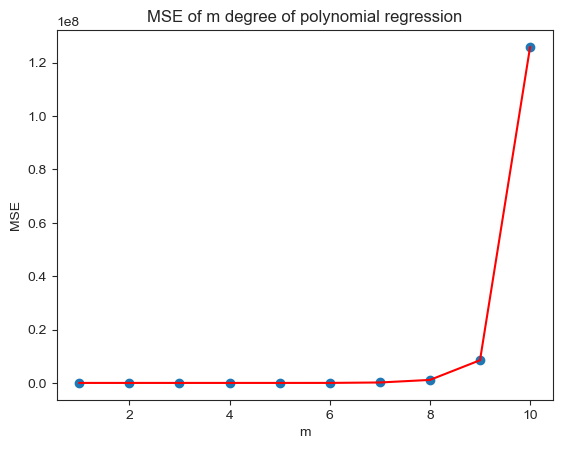

In [11]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, "r")
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")